In [1]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.24.2


In [14]:
#!pip install catboost
import catboost
print(catboost.__version__)

1.0.3


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

In [16]:
df_train = pd.read_csv(r"C:\Users\User\Desktop\codes_data\Sandstone\Train_Data_Sand_final.csv")
df_train.head()

,MD,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM
0,3153.9180,2.6255,111.6507,0.002856,0.2451,0.0350,2.4820,2.3209,2.1170,3.62550,2.8706,1.03500,0.035000,17.121300,1.00,0.646870,1.00000,1.116474
1,3059.8872,2.3439,51.3317,13.115390,0.1195,0.1722,6.6866,4.6192,2.1794,2.61980,2.4634,0.44810,0.047510,10.968882,0.28,-2.264150,0.27590,199.653700
2,1271.2000,2.1300,40.2600,5749.670000,0.2800,0.3000,1.3900,27.8000,10.4000,2.81212,2.4100,0.98212,0.204636,9.260335,0.68,-0.631068,0.68212,146.890100
3,3055.9248,2.6137,103.4771,2.204989,0.1980,0.0381,5.8435,5.9513,4.1498,3.61370,2.8117,1.03810,0.038100,16.445610,1.00,0.646870,1.00000,35.907670
4,3201.4668,2.5744,129.7570,0.005124,0.2313,0.0572,2.2890,2.3533,2.1996,3.57440,2.8057,1.05720,0.057200,18.276937,1.00,0.646870,1.00000,2.219201


In [17]:
df_test = pd.read_csv(r"C:\Users\User\Desktop\codes_data\Sandstone\Test_Data_Sand_Final.csv")
df_test.head()

,MD,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM
0,1266.3000,2.2700,114.0700,0.050000,0.4100,0.2600,0.4100,0.6100,0.6500,3.2700,2.6800,1.2600,0.260000,16.091579,1.00,0.646870,1.0000,6.346738
1,3165.9576,2.4988,166.8955,0.016207,0.3344,0.1025,1.9151,1.8651,1.7148,3.4988,2.8332,1.1025,0.102500,20.421520,1.00,0.646870,1.0000,2.659890
2,3054.4008,2.3077,56.0079,35.652750,0.0987,0.1935,15.1619,12.6920,6.6135,2.4718,2.4064,0.3576,0.031753,11.368792,0.16,-2.713607,0.1641,292.149200
3,3147.0600,2.6167,90.9038,0.000213,0.1945,0.0337,3.2695,3.2479,2.8147,3.6167,2.8112,1.0337,0.033700,15.422969,1.00,0.646870,1.0000,3.029543
4,3158.9472,2.6398,71.0053,0.000085,0.0599,0.0146,11.9478,11.8025,8.0843,3.6398,2.6997,1.0146,0.014600,13.690865,1.00,0.646870,1.0000,5.726916


In [18]:
#set MD as index
df_train = df_train.set_index('MD')
df_train.head()

,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM
MD,,,,,,,,,,,,,,,,,
3153.9180,2.6255,111.6507,0.002856,0.2451,0.0350,2.4820,2.3209,2.1170,3.62550,2.8706,1.03500,0.035000,17.121300,1.00,0.646870,1.00000,1.116474
3059.8872,2.3439,51.3317,13.115390,0.1195,0.1722,6.6866,4.6192,2.1794,2.61980,2.4634,0.44810,0.047510,10.968882,0.28,-2.264150,0.27590,199.653700
1271.2000,2.1300,40.2600,5749.670000,0.2800,0.3000,1.3900,27.8000,10.4000,2.81212,2.4100,0.98212,0.204636,9.260335,0.68,-0.631068,0.68212,146.890100
3055.9248,2.6137,103.4771,2.204989,0.1980,0.0381,5.8435,5.9513,4.1498,3.61370,2.8117,1.03810,0.038100,16.445610,1.00,0.646870,1.00000,35.907670
3201.4668,2.5744,129.7570,0.005124,0.2313,0.0572,2.2890,2.3533,2.1996,3.57440,2.8057,1.05720,0.057200,18.276937,1.00,0.646870,1.00000,2.219201


In [19]:
# create the inputs and outputs for train data
X_train = df_train.drop(['T2LM', 'New_feat', 'New_feat2', 'New_feat3', 'New_feat4', 'New_feat5', 'New_feat6', 'New_feat7'], 1) #Feature Matrix
y_train = df_train[['T2LM']]

In [20]:
#set MD as index
df_test = df_test.set_index('MD')
df_test.head()

,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM
MD,,,,,,,,,,,,,,,,,
1266.3000,2.2700,114.0700,0.050000,0.4100,0.2600,0.4100,0.6100,0.6500,3.2700,2.6800,1.2600,0.260000,16.091579,1.00,0.646870,1.0000,6.346738
3165.9576,2.4988,166.8955,0.016207,0.3344,0.1025,1.9151,1.8651,1.7148,3.4988,2.8332,1.1025,0.102500,20.421520,1.00,0.646870,1.0000,2.659890
3054.4008,2.3077,56.0079,35.652750,0.0987,0.1935,15.1619,12.6920,6.6135,2.4718,2.4064,0.3576,0.031753,11.368792,0.16,-2.713607,0.1641,292.149200
3147.0600,2.6167,90.9038,0.000213,0.1945,0.0337,3.2695,3.2479,2.8147,3.6167,2.8112,1.0337,0.033700,15.422969,1.00,0.646870,1.0000,3.029543
3158.9472,2.6398,71.0053,0.000085,0.0599,0.0146,11.9478,11.8025,8.0843,3.6398,2.6997,1.0146,0.014600,13.690865,1.00,0.646870,1.0000,5.726916


In [21]:
# create the inputs and outputs for test data
X_test = df_test.drop(['T2LM', 'New_feat', 'New_feat2', 'New_feat3', 'New_feat4', 'New_feat5', 'New_feat6', 'New_feat7'], 1) #Feature Matrix
y_test = df_test[['T2LM']]

In [11]:
from catboost import CatBoostRegressor

# CatBoost Regressor
model = CatBoostRegressor()

model.fit(X_train, y_train)

# evaluate the model
pred = model.predict(X_test)

# Evaluate model predictions

model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))
print('MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, pred, power=1)))

Learning rate set to 0.042671
0:	learn: 102.5166374	total: 169ms	remaining: 2m 48s
1:	learn: 99.5811290	total: 180ms	remaining: 1m 29s
2:	learn: 96.7518489	total: 185ms	remaining: 1m 1s
3:	learn: 94.1519498	total: 201ms	remaining: 50.1s
4:	learn: 91.6096184	total: 207ms	remaining: 41.3s
5:	learn: 89.1529758	total: 220ms	remaining: 36.4s
6:	learn: 86.9999019	total: 228ms	remaining: 32.3s
7:	learn: 84.7893673	total: 238ms	remaining: 29.5s
8:	learn: 82.6463024	total: 244ms	remaining: 26.8s
9:	learn: 80.7026230	total: 251ms	remaining: 24.9s
10:	learn: 78.7988419	total: 263ms	remaining: 23.6s
11:	learn: 76.9858727	total: 269ms	remaining: 22.2s
12:	learn: 75.3526885	total: 285ms	remaining: 21.7s
13:	learn: 73.8832814	total: 294ms	remaining: 20.7s
14:	learn: 72.3587824	total: 307ms	remaining: 20.2s
15:	learn: 70.9605243	total: 317ms	remaining: 19.5s
16:	learn: 69.6592720	total: 330ms	remaining: 19.1s
17:	learn: 68.3295147	total: 336ms	remaining: 18.3s
18:	learn: 67.0300078	total: 343ms	remain

176:	learn: 30.1322542	total: 1.68s	remaining: 7.79s
177:	learn: 30.0665948	total: 1.68s	remaining: 7.76s
178:	learn: 30.0073692	total: 1.69s	remaining: 7.75s
179:	learn: 29.8968527	total: 1.7s	remaining: 7.74s
180:	learn: 29.7988716	total: 1.71s	remaining: 7.72s
181:	learn: 29.7540873	total: 1.71s	remaining: 7.7s
182:	learn: 29.6824390	total: 1.72s	remaining: 7.69s
183:	learn: 29.6206479	total: 1.73s	remaining: 7.68s
184:	learn: 29.5003930	total: 1.74s	remaining: 7.67s
185:	learn: 29.4729272	total: 1.75s	remaining: 7.66s
186:	learn: 29.3959727	total: 1.76s	remaining: 7.66s
187:	learn: 29.3370313	total: 1.77s	remaining: 7.63s
188:	learn: 29.3038147	total: 1.78s	remaining: 7.62s
189:	learn: 29.2489757	total: 1.79s	remaining: 7.62s
190:	learn: 29.1766897	total: 1.79s	remaining: 7.6s
191:	learn: 29.0806475	total: 1.8s	remaining: 7.59s
192:	learn: 29.0234745	total: 1.81s	remaining: 7.56s
193:	learn: 28.9406951	total: 1.82s	remaining: 7.55s
194:	learn: 28.8191355	total: 1.82s	remaining: 7.5

343:	learn: 20.2185042	total: 3.1s	remaining: 5.9s
344:	learn: 20.1881182	total: 3.1s	remaining: 5.89s
345:	learn: 20.1663747	total: 3.11s	remaining: 5.89s
346:	learn: 20.1232932	total: 3.12s	remaining: 5.87s
347:	learn: 20.0819011	total: 3.13s	remaining: 5.87s
348:	learn: 20.0359020	total: 3.14s	remaining: 5.85s
349:	learn: 20.0231384	total: 3.14s	remaining: 5.83s
350:	learn: 19.9743141	total: 3.15s	remaining: 5.83s
351:	learn: 19.9133854	total: 3.16s	remaining: 5.82s
352:	learn: 19.8947635	total: 3.17s	remaining: 5.81s
353:	learn: 19.8731687	total: 3.19s	remaining: 5.82s
354:	learn: 19.8531139	total: 3.19s	remaining: 5.8s
355:	learn: 19.8145118	total: 3.2s	remaining: 5.79s
356:	learn: 19.7773115	total: 3.21s	remaining: 5.79s
357:	learn: 19.7364008	total: 3.23s	remaining: 5.79s
358:	learn: 19.7166637	total: 3.23s	remaining: 5.77s
359:	learn: 19.6852975	total: 3.24s	remaining: 5.77s
360:	learn: 19.6443520	total: 3.25s	remaining: 5.75s
361:	learn: 19.5758630	total: 3.26s	remaining: 5.74

518:	learn: 14.5635213	total: 4.5s	remaining: 4.17s
519:	learn: 14.5505157	total: 4.51s	remaining: 4.16s
520:	learn: 14.5165243	total: 4.52s	remaining: 4.15s
521:	learn: 14.5023928	total: 4.52s	remaining: 4.14s
522:	learn: 14.4738761	total: 4.53s	remaining: 4.13s
523:	learn: 14.4455636	total: 4.54s	remaining: 4.12s
524:	learn: 14.4275777	total: 4.54s	remaining: 4.11s
525:	learn: 14.4150406	total: 4.55s	remaining: 4.1s
526:	learn: 14.3889948	total: 4.56s	remaining: 4.09s
527:	learn: 14.3601821	total: 4.57s	remaining: 4.08s
528:	learn: 14.3558150	total: 4.58s	remaining: 4.08s
529:	learn: 14.3481276	total: 4.58s	remaining: 4.06s
530:	learn: 14.3406339	total: 4.59s	remaining: 4.05s
531:	learn: 14.3361529	total: 4.6s	remaining: 4.04s
532:	learn: 14.3229715	total: 4.6s	remaining: 4.03s
533:	learn: 14.2995155	total: 4.61s	remaining: 4.02s
534:	learn: 14.2878579	total: 4.61s	remaining: 4.01s
535:	learn: 14.2740469	total: 4.62s	remaining: 4s
536:	learn: 14.2685808	total: 4.63s	remaining: 3.99s


690:	learn: 11.5967540	total: 5.94s	remaining: 2.65s
691:	learn: 11.5787607	total: 5.94s	remaining: 2.65s
692:	learn: 11.5473841	total: 5.95s	remaining: 2.64s
693:	learn: 11.5308005	total: 5.97s	remaining: 2.63s
694:	learn: 11.5089938	total: 5.97s	remaining: 2.62s
695:	learn: 11.5004844	total: 5.98s	remaining: 2.61s
696:	learn: 11.4915732	total: 5.99s	remaining: 2.6s
697:	learn: 11.4783574	total: 6s	remaining: 2.6s
698:	learn: 11.4417278	total: 6.01s	remaining: 2.59s
699:	learn: 11.4283506	total: 6.02s	remaining: 2.58s
700:	learn: 11.4262804	total: 6.03s	remaining: 2.57s
701:	learn: 11.4074662	total: 6.04s	remaining: 2.56s
702:	learn: 11.3993751	total: 6.04s	remaining: 2.55s
703:	learn: 11.3835783	total: 6.05s	remaining: 2.54s
704:	learn: 11.3806633	total: 6.06s	remaining: 2.54s
705:	learn: 11.3724826	total: 6.06s	remaining: 2.52s
706:	learn: 11.3601338	total: 6.07s	remaining: 2.52s
707:	learn: 11.3542037	total: 6.08s	remaining: 2.51s
708:	learn: 11.3522434	total: 6.09s	remaining: 2.5s

858:	learn: 9.3754941	total: 7.37s	remaining: 1.21s
859:	learn: 9.3502102	total: 7.38s	remaining: 1.2s
860:	learn: 9.3418326	total: 7.38s	remaining: 1.19s
861:	learn: 9.3243198	total: 7.4s	remaining: 1.18s
862:	learn: 9.3091748	total: 7.4s	remaining: 1.18s
863:	learn: 9.3079669	total: 7.41s	remaining: 1.17s
864:	learn: 9.3002916	total: 7.42s	remaining: 1.16s
865:	learn: 9.2880115	total: 7.43s	remaining: 1.15s
866:	learn: 9.2806636	total: 7.44s	remaining: 1.14s
867:	learn: 9.2638592	total: 7.45s	remaining: 1.13s
868:	learn: 9.2607597	total: 7.45s	remaining: 1.12s
869:	learn: 9.2488939	total: 7.46s	remaining: 1.11s
870:	learn: 9.2333825	total: 7.46s	remaining: 1.1s
871:	learn: 9.2279773	total: 7.47s	remaining: 1.1s
872:	learn: 9.2191627	total: 7.48s	remaining: 1.09s
873:	learn: 9.2043238	total: 7.49s	remaining: 1.08s
874:	learn: 9.1997041	total: 7.5s	remaining: 1.07s
875:	learn: 9.1820229	total: 7.51s	remaining: 1.06s
876:	learn: 9.1649051	total: 7.51s	remaining: 1.05s
877:	learn: 9.1491

ValueError: Mean Tweedie deviance error with power=1 can only be used on non-negative y and strictly positive y_pred.

In [14]:
yt = model.predict(X_train)
scipy_value = r2_score(y_train, yt)
scipy_value

0.9944627850327782

In [12]:
scipy_value = r2_score(y_test, pred)
scipy_value

0.8318121815500397

## Ignore Accuracy of Train and test data and use r2_score. Something wrong with data

# Top 9 features

In [22]:
# create the inputs and outputs for train data
X_train = df_train.drop(['T2LM', 'RES_DEP', 'RES_MED', 'RES_SLW', 'DEN', 'POR', 'New_feat4', 'New_feat6'], 1) #Feature Matrix
y_train = df_train[['T2LM']]

In [23]:
# create the inputs and outputs for test data
X_test = df_test.drop(['T2LM', 'RES_DEP', 'RES_MED', 'RES_SLW', 'DEN', 'POR', 'New_feat4', 'New_feat6'], 1) #Feature Matrix
y_test = df_test[['T2LM']]

In [27]:
# CatBoost Regressor
model = CatBoostRegressor()

model.fit(X_train, y_train)

# evaluate the model
pred = model.predict(X_test)

# Evaluate model predictions

model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))
print('MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, pred, power=1)))

Learning rate set to 0.042671
0:	learn: 102.4762271	total: 7.24ms	remaining: 7.23s
1:	learn: 99.6791689	total: 13ms	remaining: 6.49s
2:	learn: 96.8320454	total: 23.5ms	remaining: 7.83s
3:	learn: 94.0696896	total: 27.4ms	remaining: 6.82s
4:	learn: 91.5806343	total: 38ms	remaining: 7.55s
5:	learn: 89.0680156	total: 42.2ms	remaining: 6.99s
6:	learn: 86.7847573	total: 47.9ms	remaining: 6.79s
7:	learn: 84.6621429	total: 53.3ms	remaining: 6.61s
8:	learn: 82.6177710	total: 61.2ms	remaining: 6.74s
9:	learn: 80.6583606	total: 72.9ms	remaining: 7.21s
10:	learn: 78.9196182	total: 85.1ms	remaining: 7.65s
11:	learn: 77.2178648	total: 92.8ms	remaining: 7.64s
12:	learn: 75.5881934	total: 105ms	remaining: 7.95s
13:	learn: 74.0864942	total: 112ms	remaining: 7.92s
14:	learn: 72.5552555	total: 126ms	remaining: 8.24s
15:	learn: 71.1962982	total: 131ms	remaining: 8.08s
16:	learn: 69.7979098	total: 138ms	remaining: 8s
17:	learn: 68.4866846	total: 150ms	remaining: 8.17s
18:	learn: 67.2008421	total: 160ms	rem

194:	learn: 30.0990672	total: 1.18s	remaining: 4.86s
195:	learn: 30.0783563	total: 1.18s	remaining: 4.85s
196:	learn: 30.0346917	total: 1.19s	remaining: 4.85s
197:	learn: 29.9713266	total: 1.19s	remaining: 4.83s
198:	learn: 29.8985092	total: 1.2s	remaining: 4.81s
199:	learn: 29.8727095	total: 1.2s	remaining: 4.8s
200:	learn: 29.7873591	total: 1.2s	remaining: 4.78s
201:	learn: 29.7423310	total: 1.21s	remaining: 4.76s
202:	learn: 29.7109718	total: 1.21s	remaining: 4.75s
203:	learn: 29.6899183	total: 1.21s	remaining: 4.73s
204:	learn: 29.6122403	total: 1.22s	remaining: 4.72s
205:	learn: 29.5833834	total: 1.22s	remaining: 4.7s
206:	learn: 29.5041648	total: 1.22s	remaining: 4.68s
207:	learn: 29.4837885	total: 1.22s	remaining: 4.66s
208:	learn: 29.4377021	total: 1.23s	remaining: 4.64s
209:	learn: 29.4016292	total: 1.23s	remaining: 4.63s
210:	learn: 29.3831292	total: 1.23s	remaining: 4.61s
211:	learn: 29.3470170	total: 1.24s	remaining: 4.59s
212:	learn: 29.3260526	total: 1.24s	remaining: 4.57

378:	learn: 20.2189604	total: 1.67s	remaining: 2.74s
379:	learn: 20.2083935	total: 1.68s	remaining: 2.74s
380:	learn: 20.1683670	total: 1.68s	remaining: 2.73s
381:	learn: 20.1580851	total: 1.68s	remaining: 2.72s
382:	learn: 20.1446378	total: 1.69s	remaining: 2.72s
383:	learn: 20.1265915	total: 1.69s	remaining: 2.71s
384:	learn: 20.1105231	total: 1.69s	remaining: 2.7s
385:	learn: 20.1006500	total: 1.69s	remaining: 2.69s
386:	learn: 20.0910096	total: 1.7s	remaining: 2.69s
387:	learn: 20.0273166	total: 1.7s	remaining: 2.68s
388:	learn: 19.9680526	total: 1.7s	remaining: 2.67s
389:	learn: 19.9487873	total: 1.7s	remaining: 2.66s
390:	learn: 19.9234021	total: 1.7s	remaining: 2.65s
391:	learn: 19.8504734	total: 1.71s	remaining: 2.65s
392:	learn: 19.7836586	total: 1.71s	remaining: 2.64s
393:	learn: 19.7661193	total: 1.71s	remaining: 2.63s
394:	learn: 19.7496693	total: 1.71s	remaining: 2.62s
395:	learn: 19.7148041	total: 1.72s	remaining: 2.62s
396:	learn: 19.7032216	total: 1.72s	remaining: 2.61s

605:	learn: 14.3073169	total: 2.35s	remaining: 1.53s
606:	learn: 14.2961949	total: 2.35s	remaining: 1.52s
607:	learn: 14.2856670	total: 2.36s	remaining: 1.52s
608:	learn: 14.2600089	total: 2.36s	remaining: 1.52s
609:	learn: 14.2404289	total: 2.36s	remaining: 1.51s
610:	learn: 14.2255437	total: 2.37s	remaining: 1.51s
611:	learn: 14.2096464	total: 2.37s	remaining: 1.5s
612:	learn: 14.1936519	total: 2.37s	remaining: 1.5s
613:	learn: 14.1825277	total: 2.37s	remaining: 1.49s
614:	learn: 14.1681235	total: 2.38s	remaining: 1.49s
615:	learn: 14.1547966	total: 2.38s	remaining: 1.48s
616:	learn: 14.1447344	total: 2.38s	remaining: 1.48s
617:	learn: 14.1298741	total: 2.38s	remaining: 1.47s
618:	learn: 14.1211198	total: 2.39s	remaining: 1.47s
619:	learn: 14.1101618	total: 2.39s	remaining: 1.46s
620:	learn: 14.0965991	total: 2.39s	remaining: 1.46s
621:	learn: 14.0791992	total: 2.39s	remaining: 1.45s
622:	learn: 14.0628337	total: 2.4s	remaining: 1.45s
623:	learn: 14.0350190	total: 2.4s	remaining: 1.4

808:	learn: 11.0875594	total: 2.87s	remaining: 677ms
809:	learn: 11.0663650	total: 2.89s	remaining: 677ms
810:	learn: 11.0540928	total: 2.89s	remaining: 674ms
811:	learn: 11.0448435	total: 2.9s	remaining: 671ms
812:	learn: 11.0304872	total: 2.9s	remaining: 668ms
813:	learn: 11.0108438	total: 2.91s	remaining: 665ms
814:	learn: 11.0018580	total: 2.91s	remaining: 662ms
815:	learn: 10.9680452	total: 2.92s	remaining: 658ms
816:	learn: 10.9514740	total: 2.92s	remaining: 655ms
817:	learn: 10.9431516	total: 2.93s	remaining: 652ms
818:	learn: 10.9402295	total: 2.94s	remaining: 649ms
819:	learn: 10.9271222	total: 2.94s	remaining: 646ms
820:	learn: 10.9131518	total: 2.94s	remaining: 642ms
821:	learn: 10.9103955	total: 2.95s	remaining: 639ms
822:	learn: 10.9075888	total: 2.95s	remaining: 635ms
823:	learn: 10.8969630	total: 2.95s	remaining: 631ms
824:	learn: 10.8822408	total: 2.96s	remaining: 628ms
825:	learn: 10.8567705	total: 2.96s	remaining: 624ms
826:	learn: 10.8484064	total: 2.96s	remaining: 6

Accuracy of train data: -2538.1158339777844
Accuracy of test data: -428.79425863447915
Mean Absolute Error: 14.987166316065933
Mean Squared Error: 1682.7281263723264
Root Mean Squared Error: 41.021069298256066
MAPE 0.494
MPD 10.311


In [28]:
yt = model.predict(X_train)
scipy_value = r2_score(y_train, yt)
scipy_value

0.9930087463429236

In [19]:
scipy_value = r2_score(y_test, pred)
scipy_value

0.8339780189020514

## Bayesian optimisation does not run with scikit-learn version 0.24.1. Also, version 0.23.1 does not work calculate MAPE and MPD

In [12]:
#!pip install scikit-optimize
from skopt import gp_minimize
from skopt import BayesSearchCV
from skopt.space import Integer, Real

In [17]:
model.get_params() 

{'loss_function': 'RMSE'}

In [18]:
search_space = {'n_estimators': Integer(1, 2000),
               'learning_rate': Real(1E-5, 1, prior="uniform"),
               'max_depth': Integer(1, 16)}
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

bayes_search = BayesSearchCV(model, search_space, cv=3, n_jobs=-1, verbose=1, n_iter=20, random_state=0)

In [19]:
bayes_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3,
              estimator=<catboost.core.CatBoostRegressor object at 0x000000000B8E2FD0>,
              n_iter=20, n_jobs=-1, random_state=0,
              search_spaces={'learning_rate': Real(low=1e-05, high=1, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=1, high=16, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=2000, prior='uniform', transform='normalize')},
              verbose=1)

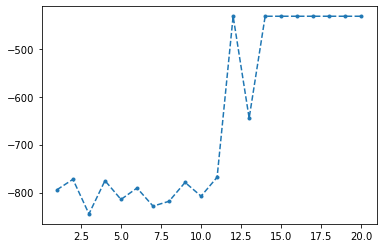

In [20]:
plt.plot(range(1,21), bayes_search.cv_results_['mean_test_score'], '.--')
plt.show()

In [21]:
bayes_search.best_score_

-432.19866025953644

In [22]:
bayes_search.best_params_

OrderedDict([('learning_rate', 1e-05), ('max_depth', 6), ('n_estimators', 1)])

In [23]:
# Bayes

model = bayes_search.best_estimator_

model.fit(X_train, y_train)

# evaluate the model
pred = model.predict(X_test)

# Print the name and gini importance of each feature
for feature in zip(X_train.columns, model.feature_importances_):
    print(feature)

0:	learn: 105.6091200	total: 10.5ms	remaining: 0us
('GR', 17.520312427415078)
('PERM', 39.50681044891065)
('NEU', 5.93245423719485)
('New_feat', 0.0)
('New_feat2', 0.0)
('New_feat3', 0.0)
('New_feat5', 0.09829531909536866)
('New_feat7', 0.0)
('SW', 36.94212756738405)


In [24]:
# Evaluate model predictions

model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))

Accuracy of train data: -1298.0000000865186
Accuracy of test data: -229.12105621910703
Mean Absolute Error: 72.24229631706488
Mean Squared Error: 10140.755208778597
Root Mean Squared Error: 100.70131681750044


In [25]:
scipy_value = r2_score(y_test, pred)
scipy_value

-0.0005111599461364857

In [26]:
yy = model.predict(X_train)

In [27]:
scipy_value = r2_score(y_train, yy)
scipy_value

1.398505145000506e-05

In [29]:
df_test['CB_Test'] = pred
df_test.head()

,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM,CB_Test
MD,,,,,,,,,,,,,,,,,,
1266.3000,2.2700,114.0700,0.050000,0.4100,0.2600,0.4100,0.6100,0.6500,3.2700,2.6800,1.2600,0.260000,16.091579,1.00,0.646870,1.0000,6.346738,5.216913
3165.9576,2.4988,166.8955,0.016207,0.3344,0.1025,1.9151,1.8651,1.7148,3.4988,2.8332,1.1025,0.102500,20.421520,1.00,0.646870,1.0000,2.659890,3.347025
3054.4008,2.3077,56.0079,35.652750,0.0987,0.1935,15.1619,12.6920,6.6135,2.4718,2.4064,0.3576,0.031753,11.368792,0.16,-2.713607,0.1641,292.149200,261.305884
3147.0600,2.6167,90.9038,0.000213,0.1945,0.0337,3.2695,3.2479,2.8147,3.6167,2.8112,1.0337,0.033700,15.422969,1.00,0.646870,1.0000,3.029543,2.947194
3158.9472,2.6398,71.0053,0.000085,0.0599,0.0146,11.9478,11.8025,8.0843,3.6398,2.6997,1.0146,0.014600,13.690865,1.00,0.646870,1.0000,5.726916,5.412417


In [30]:
df_test.to_csv('Predicted_Test_Data_CB.csv')